In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/subodh-train/train.csv


In [6]:
import pandas as pd
import numpy as np


In [8]:

import os
print(os.listdir("/kaggle/input/"))


['subodh-train']


In [9]:
# df= pd.read_csv("/kaggle/input/subodh-train.csv")
df = pd.read_csv("/kaggle/input/subodh-train/train.csv")

In [10]:
df.shape

(103904, 25)

In [11]:
df.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
16913,16913,73657,Male,Loyal Customer,60,Business travel,Business,192,0,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
33124,33124,55357,Female,Loyal Customer,41,Business travel,Business,3396,1,1,...,5,5,5,5,5,5,5,9,0.0,satisfied
24341,24341,17960,Male,disloyal Customer,15,Business travel,Eco,501,4,0,...,3,3,4,2,5,3,3,0,0.0,satisfied
50090,50090,2606,Female,Loyal Customer,65,Personal Travel,Eco,280,3,4,...,4,4,4,4,4,4,3,0,6.0,neutral or dissatisfied
99457,99457,54473,Male,Loyal Customer,39,Business travel,Eco,925,4,4,...,4,2,4,5,3,4,4,62,46.0,satisfied
39015,39015,120278,Male,Loyal Customer,32,Business travel,Business,1576,2,1,...,2,3,5,2,2,2,2,69,64.0,neutral or dissatisfied
62110,62110,72937,Male,Loyal Customer,54,Business travel,Business,1096,4,4,...,2,2,2,2,4,2,5,0,0.0,satisfied
65697,65697,58413,Male,Loyal Customer,41,Business travel,Business,3092,1,1,...,4,4,4,4,5,4,4,0,0.0,satisfied
40653,40653,40003,Female,Loyal Customer,50,Business travel,Eco,525,5,5,...,5,5,5,5,2,5,4,0,0.0,satisfied
85191,85191,6724,Female,Loyal Customer,40,Business travel,Business,1574,2,2,...,3,3,4,3,5,3,4,0,0.0,satisfied


In [12]:
#df.drop(['Unnamed: 0','id'] , inplace=True)
df = df.drop(columns=[col for col in ['Unnamed: 0', 'id'] if col in df.columns])

In [14]:
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [15]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [16]:
import pandas as pd
import numpy as np

print("DATA EXPLORATION")
print("*" * 70)

# Shape of dataset
print(f"Shape of dataset: {df.shape}")
print("*" * 70)

# Dataset Information
print(df.info())
print("*" * 70)

# Statistical Summary of Numerical Columns
print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
print("*" * 70)
print(df.describe())
print("*" * 70)

# Statistical Summary of Categorical Columns
print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
print("*" * 70)
print(df.describe(include=["O"]))  # "O" means object (categorical data)
print("*" * 70)

# Missing Values Count
print("MISSING VALUES")
print("*" * 70)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values
print("*" * 70)

# Missing Values Percentage
print("MISSING VALUES IN %")
print("*" * 70)
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])  # Display only columns with missing values
print("*" * 70)


DATA EXPLORATION
**********************************************************************
Shape of dataset: (103904, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 no

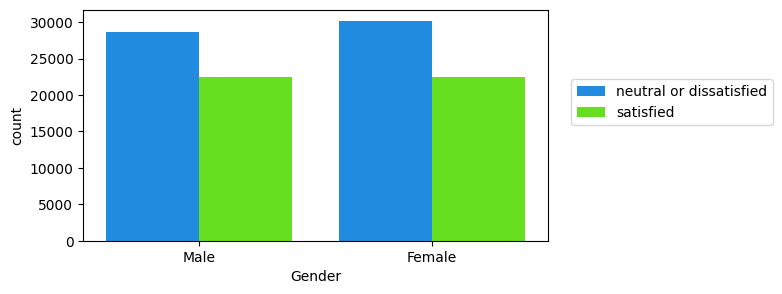

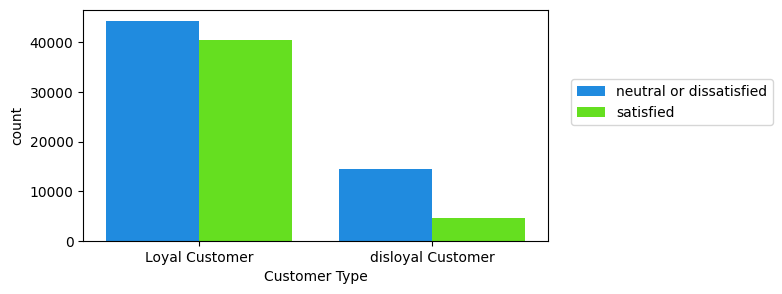

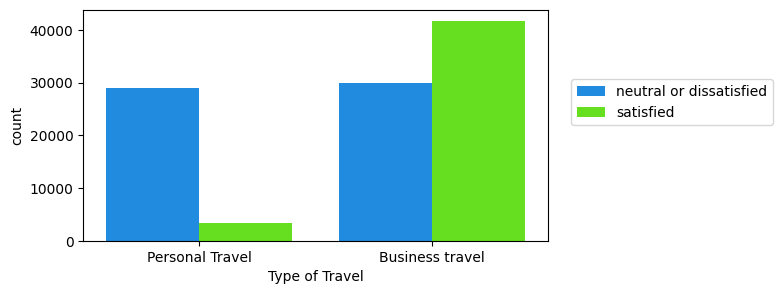

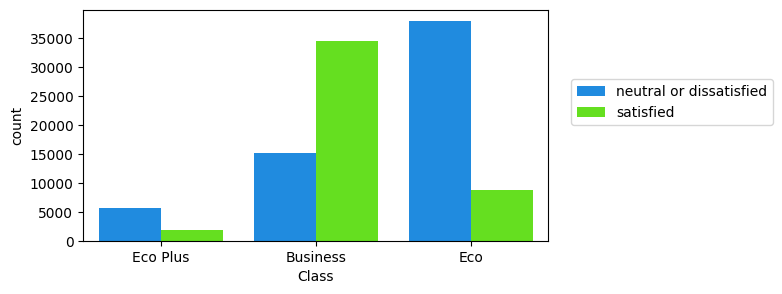

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

In [25]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = data.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

In [27]:
get_insights(df)


**********************************************************************
Insights from 'Gender' data
**********************************************************************
57.26 from Female are neutral or dissatisfied
56.05 from Male are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Customer Type' data
**********************************************************************
52.27 from Loyal Customer are neutral or dissatisfied
76.33 from disloyal Customer are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Type of Travel' data
**********************************************************************
58.26 from Business travel are satisfied
89.83 from Personal Travel are neutral or dissatisfied
************************************

<ipython-input-25-7d1f2165df11>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
<ipython-input-25-7d1f2165df11>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
<ipython-input-25-7d1f2165df11>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('

In [28]:
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9790,Female,Loyal Customer,33,Business travel,Business,1804,2,2,2,2,...,5,5,4,5,3,5,2,0,1.0,satisfied
52094,Female,Loyal Customer,53,Personal Travel,Eco,853,1,5,1,5,...,1,1,1,5,1,1,5,0,0.0,neutral or dissatisfied
97308,Female,disloyal Customer,27,Business travel,Eco,1562,2,2,2,2,...,2,1,4,4,5,1,2,0,0.0,neutral or dissatisfied
8518,Female,disloyal Customer,36,Business travel,Eco,1120,2,2,2,4,...,5,2,5,3,3,4,5,70,67.0,neutral or dissatisfied
63940,Male,Loyal Customer,60,Business travel,Business,302,2,2,4,2,...,4,4,4,4,2,4,4,33,19.0,satisfied


In [29]:
print(df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
# Columns to encode
categorical_cols = ['Gender', 'Customer Type','Class', 'Type of Travel', 'satisfaction']

# Apply LabelEncoder to all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


<Axes: >

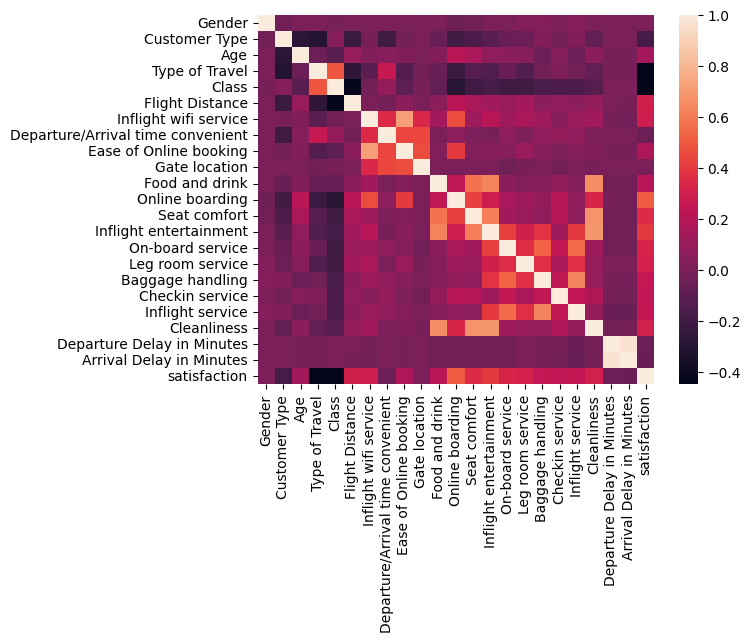

In [31]:
sns.heatmap(df.corr())


In [33]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  23
********************************************************************************
Numerical Variables Column:  ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


<ipython-input-36-ad77c65f952b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,3), dpi=100)


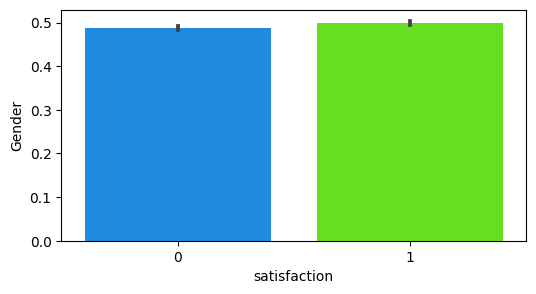

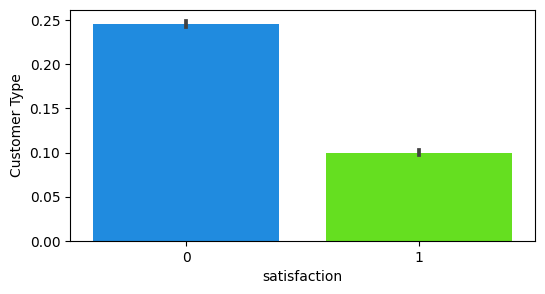

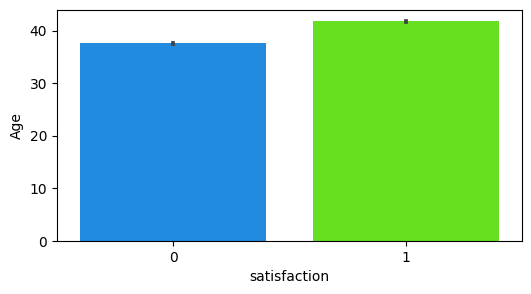

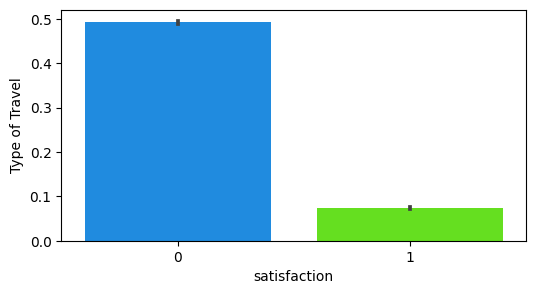

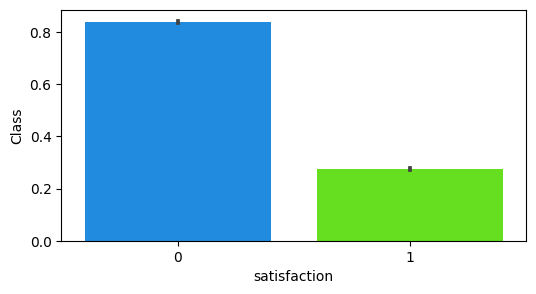

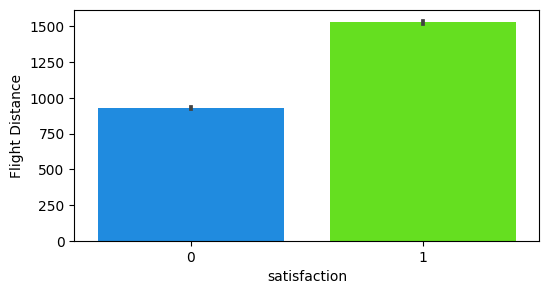

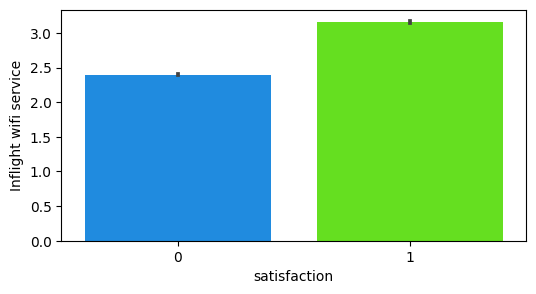

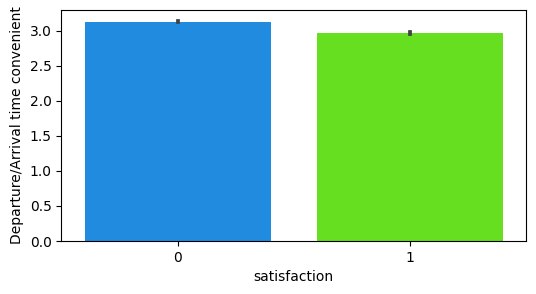

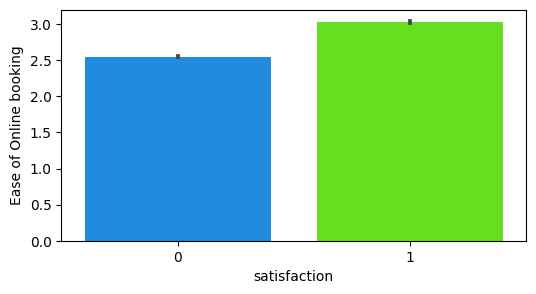

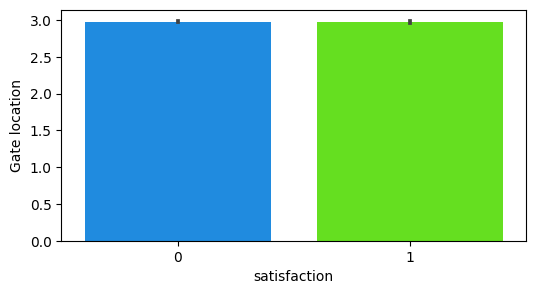

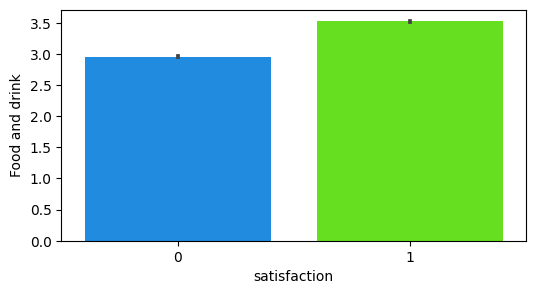

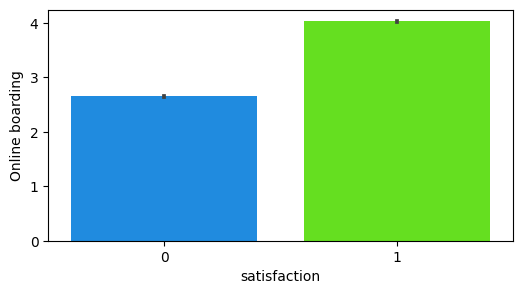

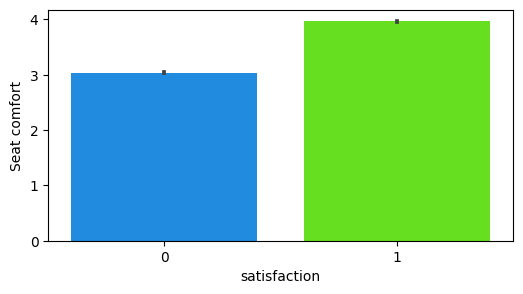

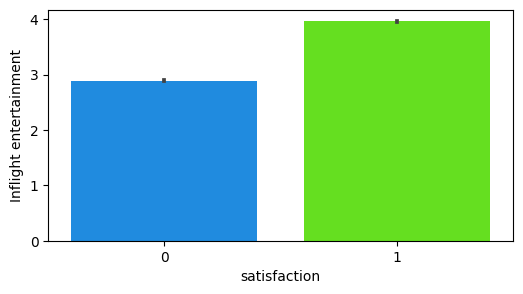

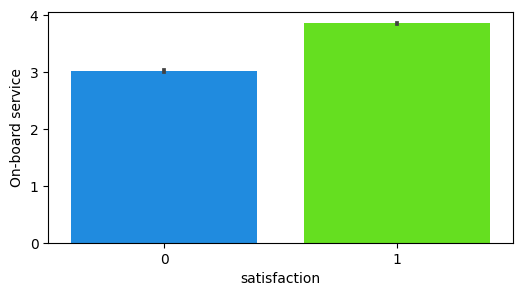

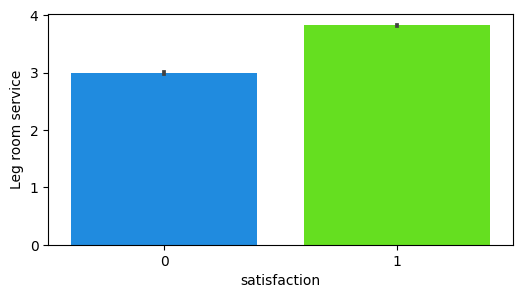

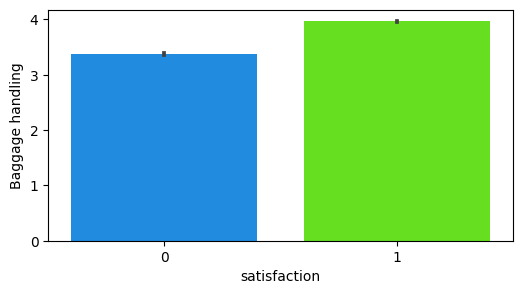

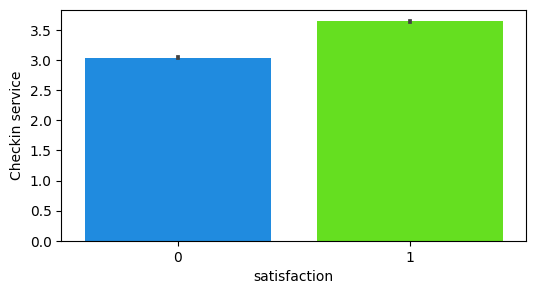

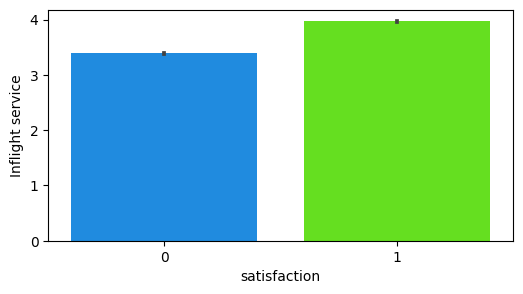

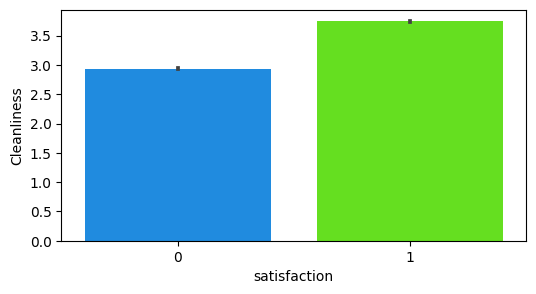

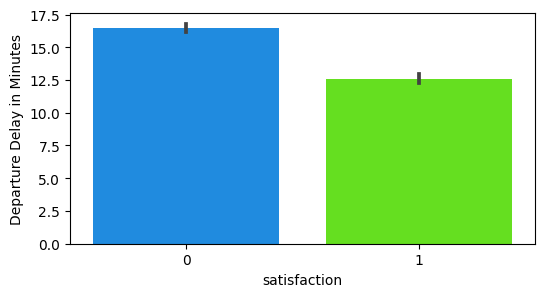

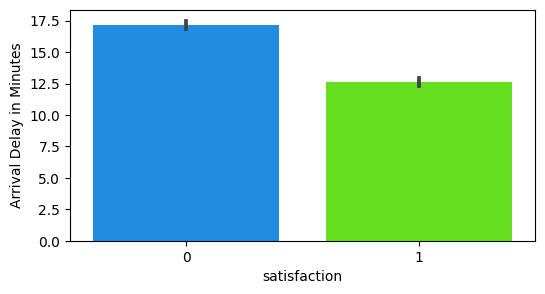

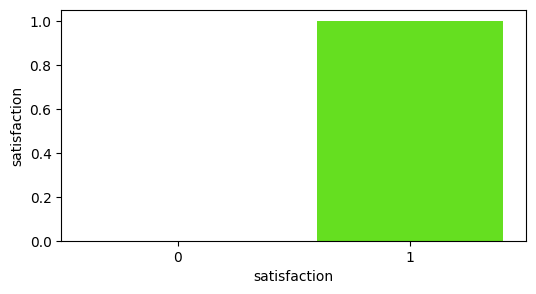

In [36]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')

In [37]:
# From the plots, it is clear that age and Gate location, does not play a huge role in flight satisfaction, and also the gender 
# does not tell us much as seen in the earlier plot. Hence we drop these values
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)


In [38]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
0    17.127536
1    12.630799
Name: Arrival Delay in Minutes, dtype: float64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

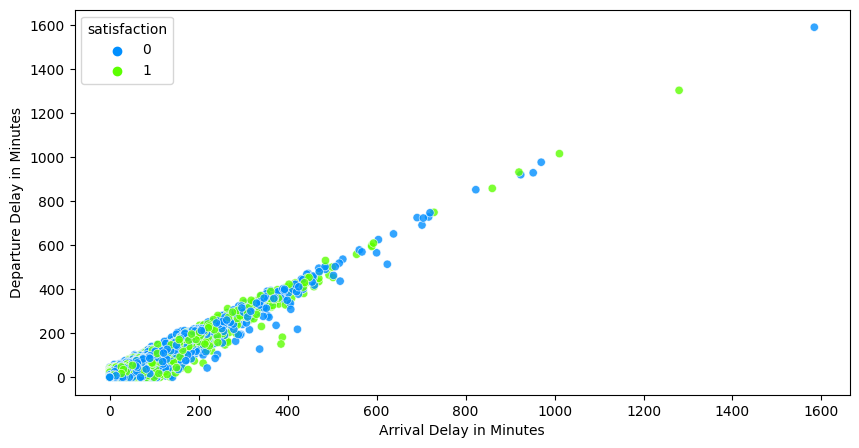

In [40]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

(0.0, 1000.0)

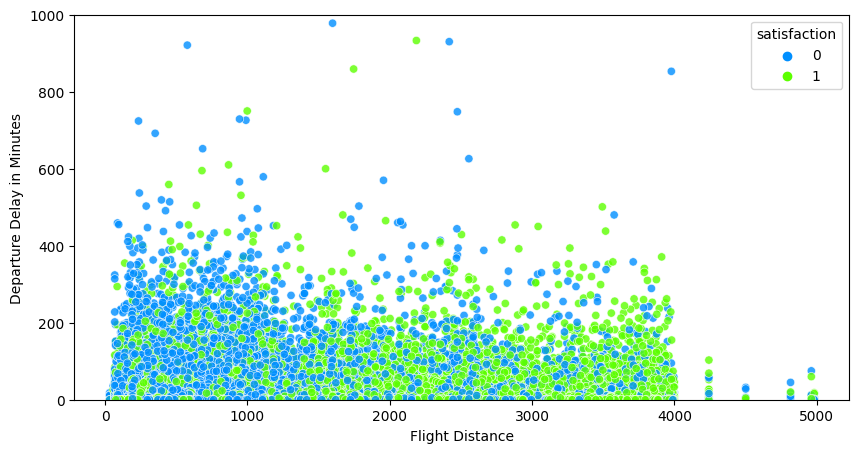

In [42]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

In [ ]:
# # The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in \
# departure, which is a strange finding from this plot! So departure delay is less of a factor for 
# long distance flight, comparitively, however, short distance travellers does not seem to be excited about 
# the departure delays, which also makes sense

# Generally, business class seems to have been satisfied more than the passengers from economy or economy plus, let's analyze that

In [44]:
df.sample(5)

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
84372,1,0,1,817,2,2,2,4,2,4,4,2,5,4,1,3,4,0,0.0,0
94719,0,1,1,1069,3,4,3,3,3,3,3,3,3,4,3,4,3,114,116.0,0
2648,0,0,0,867,2,4,4,3,4,3,2,2,2,2,4,2,2,15,10.0,0
35018,0,1,1,967,2,5,2,4,2,4,4,4,2,4,3,4,4,0,0.0,0
72426,0,0,0,628,3,3,3,3,4,4,4,4,4,4,5,4,5,0,0.0,1


In [ ]:
# df.groupby('Class_eco').mean()


In [45]:
df.isna().sum()

Customer Type                          0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [49]:
df_copy=df.copy()


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

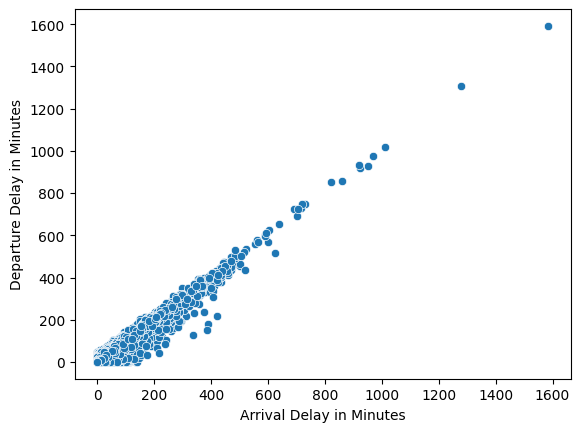

In [51]:
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')

In [53]:
df.isnull().values.any()

True

In [57]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])

In [59]:
df.isnull().values.any()

False

In [61]:
df.isna().sum()

Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [62]:
df=pd.get_dummies(df)

In [64]:
df.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,2,460,3,4,3,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,0,0,235,3,2,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,0,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,0,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,0,0,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [65]:
df.shape

(103904, 20)

In [68]:
#Preparing X and Y
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [71]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
#Scaling the features with pipeline method, and standard scaler
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [79]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
#  #Modeling step to test differents algorithms 
# random_state = 2
# classifiers = []
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(XGBClassifier(random_state=random_state))

# cv_results = []
# for classifier in classifiers :
#     cv_results.append(cross_val_score(classifier, scaled_X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

# cv_means = []
# cv_std = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighbors","SVC","DecisionTree","AdaBoost",
# "RandomForest","GradientBoosting","XGBoost"]})

# g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")

In [ ]:
# # Import necessary libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

# # Set random state
# random_state = 2  

# # Define optimized classifiers
# classifiers = [
#     LogisticRegression(random_state=random_state, n_jobs=-1),  # Use n_jobs for parallel computation
#     KNeighborsClassifier(n_jobs=-1),  # Speed up for large datasets
#     SVC(random_state=random_state),  # No n_jobs for SVC
#     DecisionTreeClassifier(random_state=random_state),
    
#     # Optimized Boosting Models
#     AdaBoostClassifier(
#         base_estimator=DecisionTreeClassifier(random_state=random_state),
#         n_estimators=50,  # Reduce estimators for speed
#         learning_rate=0.1,
#         random_state=random_state
#     ),
    
#     RandomForestClassifier(n_estimators=50, warm_start=True, n_jobs=-1, random_state=random_state),
#     GradientBoostingClassifier(n_estimators=50, random_state=random_state),
    
#     XGBClassifier(n_estimators=50, tree_method='hist', random_state=random_state, use_label_encoder=False)  # Optimized for CPU
# ]

# # Reduce cross-validation folds to speed up training
# kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

# # Perform cross-validation
# cv_results = []
# for classifier in classifiers:
#     cv_results.append(cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))

# # Calculate mean accuracy and standard deviation
# cv_means = [cv.mean() for cv in cv_results]
# cv_std = [cv.std() for cv in cv_results]

# # Create DataFrame for visualization
# cv_res = pd.DataFrame({
#     "CrossValMeans": cv_means,
#     "CrossValErrors": cv_std,
#     "Algorithm": [
#         "LogisticRegression", "KNeighbors", "SVC", "DecisionTree", 
#         "AdaBoost", "RandomForest", "GradientBoosting", "XGBoost"
#     ]
# })

# # Plot results
# plt.figure(figsize=(10, 6))
# sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h", xerr=cv_std)
# plt.xlabel("Mean Accuracy")
# plt.title("Cross Validation Scores")
# plt.show()


In [80]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np

# Set random state
random_state = 2

# Cross-validation setup (5-fold for faster execution)
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Standardize data (Ensure scaled_X_train and y_train are defined before running models)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)  # X_train should be preloaded
y_train = np.array(y_train)  # Convert to NumPy array if needed
print('hi')

hi


In [82]:
classifier = LogisticRegression(random_state=random_state, n_jobs=-1)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)

print(f"Logistic Regression Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Accuracy: 0.8745 ± 0.0013


In [84]:
classifier = KNeighborsClassifier(n_jobs=-1)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)

print(f"KNN Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


KNN Accuracy: 0.9308 ± 0.0012


In [ ]:
classifier = SVC(random_state=random_state)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
print(f"SVC Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [87]:
classifier = DecisionTreeClassifier(random_state=random_state)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
print(f"Decision Tree Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Decision Tree Accuracy: 0.9413 ± 0.0023


In [88]:
classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(random_state=random_state),
    n_estimators=50,  # Reduced for faster execution
    learning_rate=0.1,
    random_state=random_state
)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)

print(f"AdaBoost Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


AdaBoost Accuracy: 0.9421 ± 0.0018


In [89]:
classifier = RandomForestClassifier(n_estimators=50, warm_start=True, n_jobs=-1, random_state=random_state)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)

print(f"Random Forest Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Accuracy: 0.9595 ± 0.0009


In [91]:
classifier = GradientBoostingClassifier(n_estimators=50, random_state=random_state)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)

print(f"Gradient Boosting Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Gradient Boosting Accuracy: 0.9340 ± 0.0020


In [93]:
classifier = XGBClassifier(n_estimators=50, tree_method='hist', random_state=random_state, use_label_encoder=False)
cv_scores = cross_val_score(classifier, scaled_X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
print(f"XGBoost Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


XGBoost Accuracy: 0.9595 ± 0.0011


In [95]:
#Fitting the model to calculate accuracy
model_xgb = XGBClassifier(random_state =random_state)
model_xgb.fit(scaled_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [96]:
#Predicting and calculating accuracy score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pred_xgb = model_xgb.predict(scaled_X_test)
accuracy_score(y_test,pred_xgb)


0.9609739666041095

XGBoost Model Accuracy: 0.9610


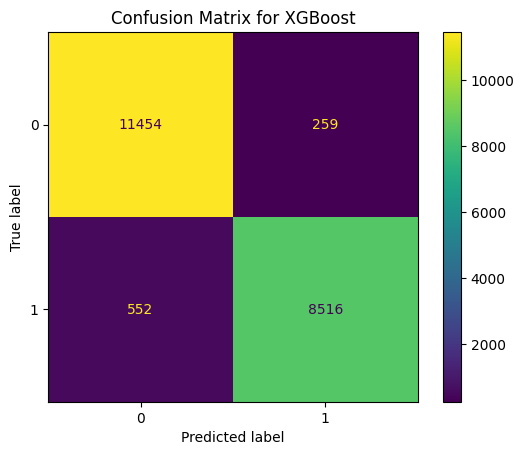

In [98]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the test set
pred_xgb = model_xgb.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb)
plt.title("Confusion Matrix for XGBoost")
plt.show()


XGBoost Model Accuracy: 0.9610
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



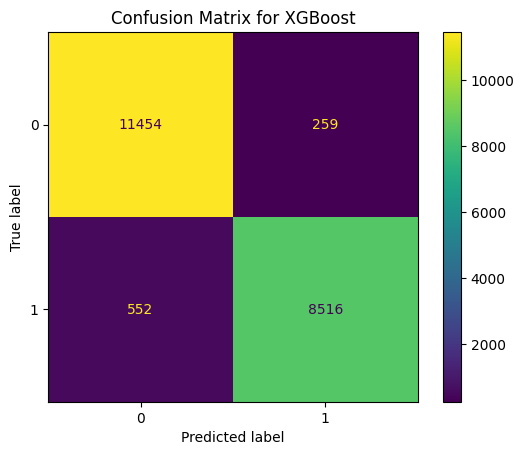

In [102]:
#print(classification_report(y_test,pred_xgb))
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict the test set
pred_xgb = model_xgb.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, pred_xgb))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb)
plt.title("Confusion Matrix for XGBoost")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

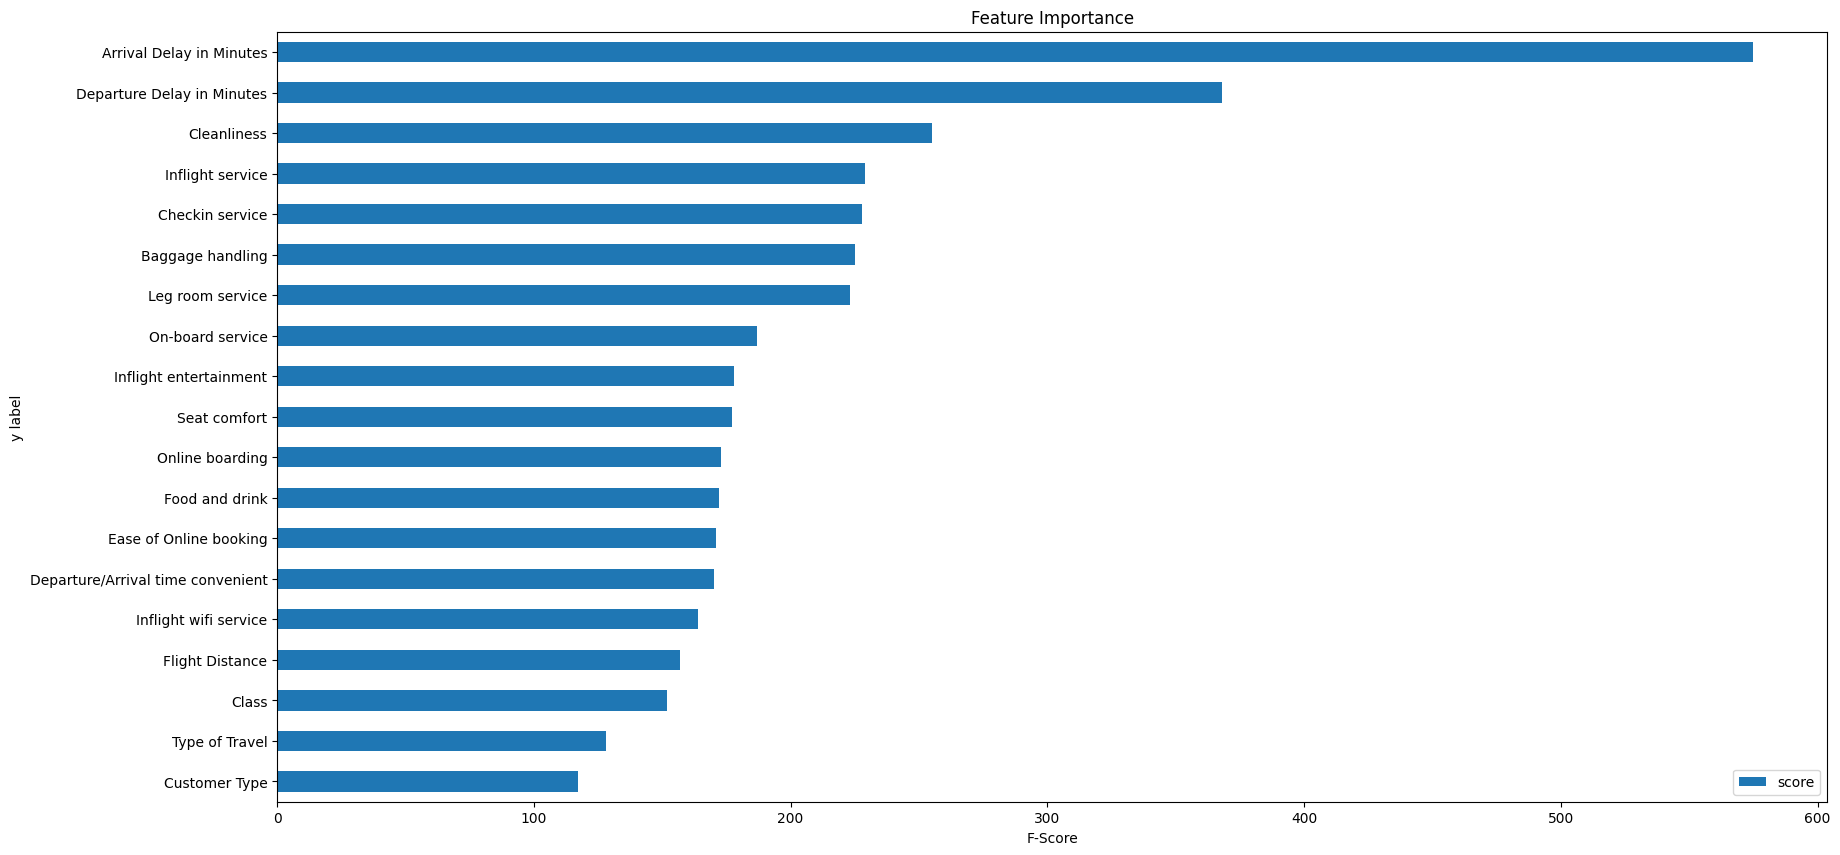

In [103]:
orig_feature_names = X_train.columns
feature_important = model_xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score")#, ascending=False)
ax =data.plot(kind='barh', figsize = (20,10))
ax.set_yticklabels(orig_feature_names); ## plot top features
#ax.set_xlabel("F-Score")
ax.set(xlabel="F-Score", ylabel="y label")
ax.set_title('Feature Importance')